https://www.kaggle.com/krantiswalke/bank-personal-loan-modelling

In [1]:
# set up the libraries 
import sklearn 
import pandas as pd 

import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 


In [2]:
bank_data=pd.read_csv('bank_data.csv')
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1,2,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
2,3,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
3,4,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
4,5,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [3]:
bank_data.shape

(480, 14)

In [4]:
bank_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
# dropping non necessary columns 
bank_data=bank_data.drop(['ID','Experience','ZIP Code','CCAvg','Personal Loan'], axis = 1)

In [6]:
bank_data.columns

Index(['Age', 'Income', 'Family', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [8]:
#check if the data has missing values 
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 480 non-null    int64
 1   Income              480 non-null    int64
 2   Family              480 non-null    int64
 3   Education           480 non-null    int64
 4   Mortgage            480 non-null    int64
 5   Securities Account  480 non-null    int64
 6   CD Account          480 non-null    int64
 7   Online              480 non-null    int64
 8   CreditCard          480 non-null    int64
dtypes: int64(9)
memory usage: 33.9 KB


In [9]:
bank_data.describe()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000,480.000000
mean,45.066667,144.745833,2.612500,2.233333,100.845833,0.125000,0.291667,0.60625,0.297917
std,11.590964,31.584429,1.115393,0.753373,160.847862,0.331064,0.455004,0.48909,0.457820
min,26.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,122.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,142.500000,3.000000,2.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,55.000000,172.000000,4.000000,3.000000,192.500000,0.000000,1.000000,1.00000,1.000000
max,65.000000,203.000000,4.000000,3.000000,617.000000,1.000000,1.000000,1.00000,1.000000


In [10]:
# write the data to csv module 
bank_data.to_csv('bank_data_processed.csv', index = False)

Text(0, 0.5, 'Age')

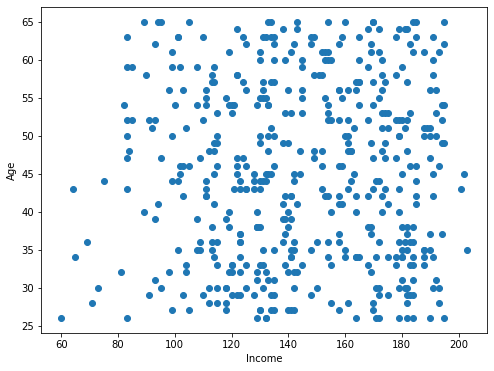

In [11]:
# scatter plot to see corelation between two variable data 
fig, ax  = plt.subplots(figsize=(8,6))
plt.scatter(bank_data['Income'], bank_data['Age'])
plt.xlabel('Income')
plt.ylabel('Age')

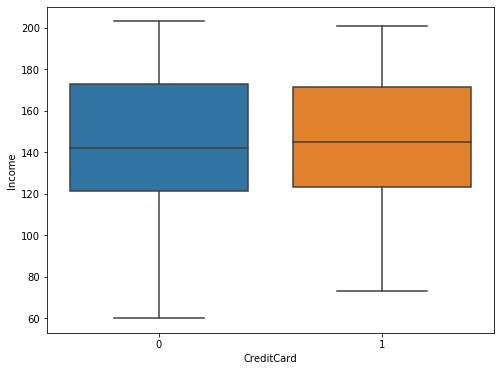

In [12]:
# box plot to see wether individuals with high income tend to be more approved for a CreditCard
fig, ax  = plt.subplots(figsize=(8,6))
sns.boxplot(bank_data['CreditCard'], bank_data['Income'])

###### blue bow (0) is for individuals without a creditcard 
###### orange box (1) individuals with Creditcard

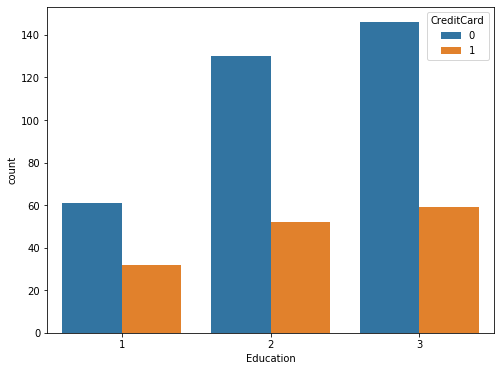

In [13]:
fig, ax  = plt.subplots(figsize=(8,6))
sns.countplot(x='Education', data=bank_data, hue ='CreditCard')

In [14]:
# set up a correlation matrix 
bank_data_corr = bank_data.corr()


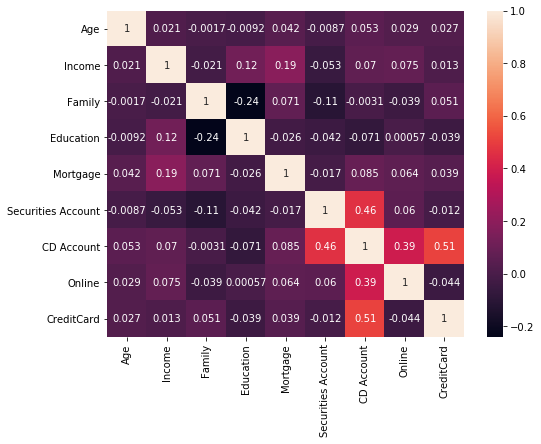

In [15]:
fig, ax  = plt.subplots(figsize=(8,6))
sns.heatmap(bank_data_corr, annot= True)

# building classification model 

In [16]:
x = bank_data.drop('CreditCard', axis =1) # x features all columns except "CreditCard" 
y = bank_data['CreditCard'] # target column 

In [17]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [18]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 

In [19]:
# intialize estimators 
log_clf = LogisticRegression(C=1,solver='liblinear')
svc_clf = SVC(C=1, kernel='linear',gamma='auto')
naive_clf = GaussianNB()

In [20]:
for clf in (log_clf,svc_clf, naive_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8229166666666666
SVC 0.8229166666666666
GaussianNB 0.7916666666666666


In [21]:
# Ensemle's final prediction will be the class with majority vote 
voting_clf_hard = VotingClassifier(estimators= [('lr',log_clf),
                                                ('svc',svc_clf),
                                                ('naive',naive_clf)],
                                               voting = 'hard')

In [22]:
# dictionary to lookup estimators by name 
voting_clf_hard.estimators

[('lr',
  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('svc',
  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('naive', GaussianNB(priors=None, var_smoothing=1e-09))]

In [23]:
# train the voting classifier 
voting_clf_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma

In [24]:
y_pred = voting_clf_hard.predict(x_test)

In [25]:
# accuracy score of the ensemble estimators
accuracy_score(y_test, y_pred)

0.8229166666666666

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        71
           1       0.83      0.40      0.54        25

    accuracy                           0.82        96
   macro avg       0.83      0.69      0.72        96
weighted avg       0.82      0.82      0.80        96



In [27]:
for clf_hard in (log_clf, svc_clf, naive_clf, voting_clf_hard):
    clf_hard.fit(x_train, y_train)
    y_pred = clf_hard.predict(x_test)
    print(clf_hard.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8229166666666666
SVC 0.8229166666666666
GaussianNB 0.7916666666666666
VotingClassifier 0.8229166666666666


###### the accuracy of the ensemble is the accuracy of the best classifier 

### Soft Voting
######  Soft voting does not look at the final classification output of the individual predictors, instead it looks at the probability scores for each of the output classes for each individual predictor. This of course means that for the voting classifier to be able to perform soft voting, all individual estimators in the ensemble should allow estimating class probabilities

In [28]:
y_pred_probs = log_clf.predict_proba(x_test)

In [29]:
y_pred_probs[:10]

array([[0.77031516, 0.22968484],
       [0.94292998, 0.05707002],
       [0.26893892, 0.73106108],
       [0.19464156, 0.80535844],
       [0.76857304, 0.23142696],
       [0.940541  , 0.059459  ],
       [0.75358329, 0.24641671],
       [0.71662306, 0.28337694],
       [0.66886714, 0.33113286],
       [0.96143373, 0.03856627]])

In [31]:
# for svc model to get the probability must passed as an argument n its estimator
svc_clf_soft = SVC(C=1, kernel='linear',gamma='auto', probability =True)

In [34]:
# Weight assigned to individual predictors to find the weighted average class probabilities
voting_clf_soft = VotingClassifier(estimators= [('lr',log_clf),
                                                ('svc',svc_clf_soft),
                                                ('naive',naive_clf)],
                                               voting = 'soft',
                                               weights= [0.40,0.30,0.30] )

In [35]:
# compare the indicidual estimatores and the voting ensemble estimator
for clf_soft in (log_clf, svc_clf, naive_clf, voting_clf_soft):
    clf_soft.fit(x_train, y_train)
    y_pred = clf_soft.predict(x_test)
    print(clf_soft.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8229166666666666
SVC 0.8229166666666666
GaussianNB 0.7916666666666666
VotingClassifier 0.8229166666666666


In [ ]:
#how ensemble learning combines the prediction of several learneresto obtain a better performance 
# what kind of individual learners 
# 
